In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import datetime
from ipywidgets import interact, widgets

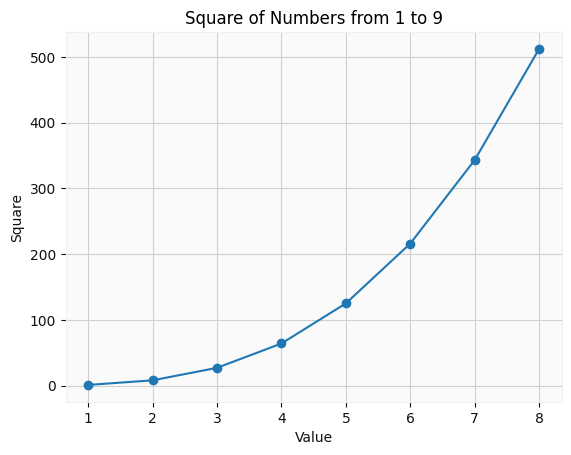

In [24]:
x = np.arange(1, 9)
y = x ** 3

plt.plot(x, y, marker='o')
plt.xlabel("Value")
plt.ylabel("Square")
plt.title("Square of Numbers from 1 to 9")
plt.grid(True)
plt.show()


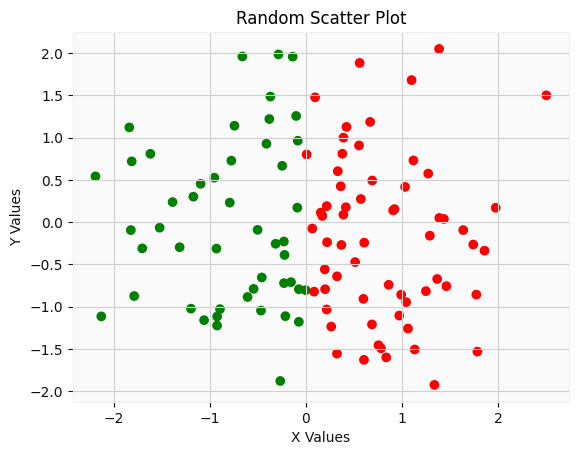

In [25]:
x = np.random.randn(110)
y = np.random.randn(110)

colors = ['red' if val > 0 else 'green' for val in x]

plt.scatter(x, y, c=colors)
plt.title("Random Scatter Plot")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.grid(True)
plt.show()


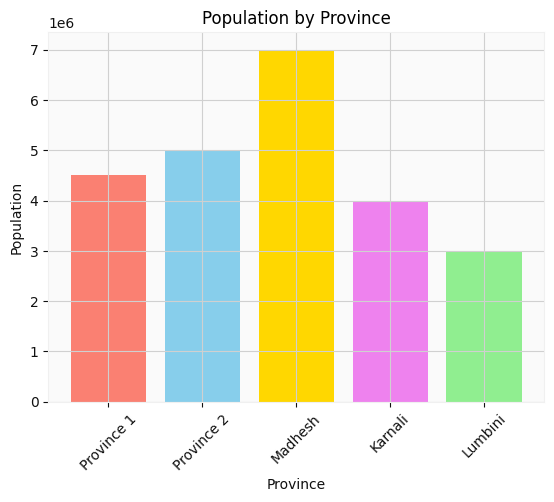

In [26]:
provinces = ['Province 1', 'Province 2', 'Madhesh', 'Karnali', 'Lumbini']
population = [4500000, 5000000,  7000000,4000000 ,3000000 ]
colors = [ 'salmon','skyblue', 'gold','violet', 'lightgreen' ]

plt.bar(provinces, population, color=colors)
plt.xlabel("Province")
plt.ylabel("Population")
plt.title("Population by Province")
plt.xticks(rotation=45)
plt.show()


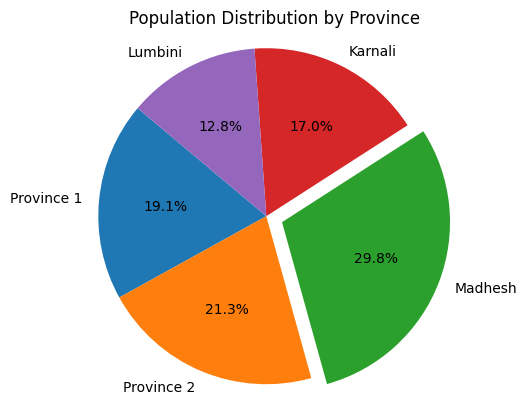

In [27]:
explode = [0.1 if p == max(population) else 0 for p in population]

plt.pie(population, labels=provinces, autopct='%1.1f%%', explode=explode, startangle=140)
plt.title("Population Distribution by Province")
plt.axis('equal')
plt.show()


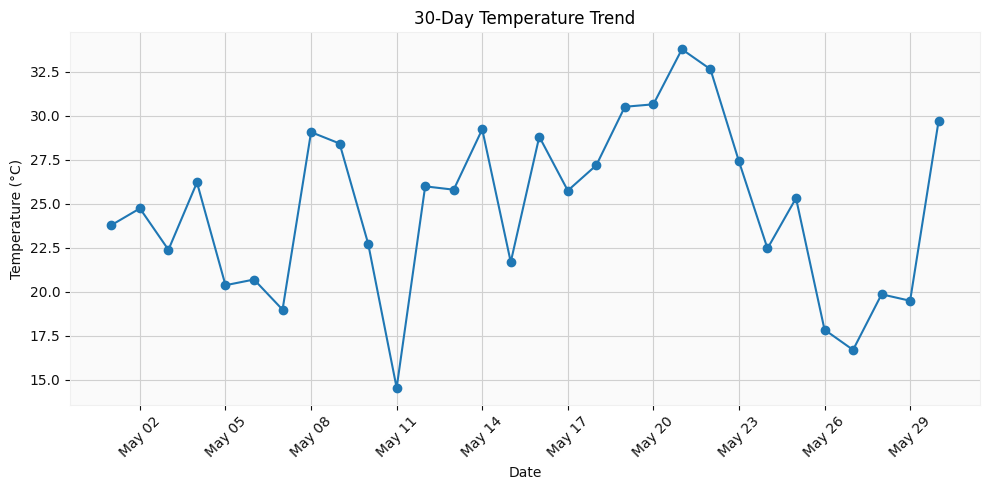

In [28]:
dates = pd.date_range(start="2025-05-01", periods=30)
temps = np.random.normal(loc=25, scale=5, size=30)
df = pd.DataFrame({'Date': dates, 'Temperature': temps})

plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Temperature'], marker='o')
plt.title("30-Day Temperature Trend")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


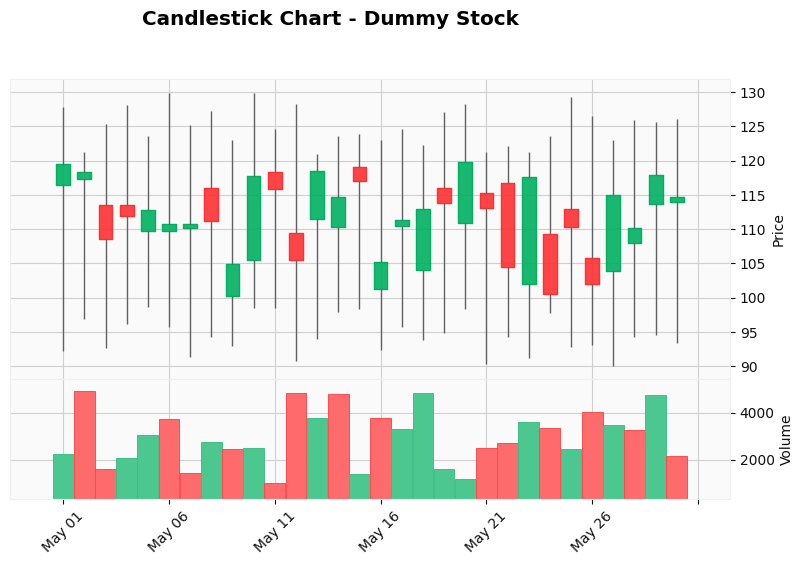

In [29]:
# Generate dummy OHLCV data
dates = pd.date_range("2025-05-01", periods=30)
data = {
    'Open': np.random.uniform(100, 120, 30),
    'High': np.random.uniform(121, 130, 30),
    'Low': np.random.uniform(90, 99, 30),
    'Close': np.random.uniform(100, 120, 30),
    'Volume': np.random.randint(1000, 5000, 30)
}
ohlc_df = pd.DataFrame(data, index=dates)

mpf.plot(ohlc_df, type='candle', volume=True, title='Candlestick Chart - Dummy Stock', style='yahoo', figsize=(10,6))


In [30]:
@interact(
    show_sin=widgets.Checkbox(value=True, description='sin(x)'),
    show_cos=widgets.Checkbox(value=True, description='cos(x)'),
    show_tan=widgets.Checkbox(value=False, description='tan(x)'),
    color=widgets.ColorPicker(value='blue', description='Line Color'),
    points=widgets.IntSlider(value=100, min=50, max=500, step=50, description='Points')
)
def plot_functions(show_sin, show_cos, show_tan, color, points):
    x = np.linspace(-2 * np.pi, 2 * np.pi, points)
    plt.figure(figsize=(10, 5))

    if show_sin:
        plt.plot(x, np.sin(x), label='sin(x)', color=color)
    if show_cos:
        plt.plot(x, np.cos(x), label='cos(x)', linestyle='--', color=color)
    if show_tan:
        y = np.tan(x)
        y[np.abs(y) > 10] = np.nan  # remove large tan values
        plt.plot(x, y, label='tan(x)', linestyle=':', color=color)

    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.title("Interactive Trigonometric Function Plotter")
    plt.legend()
    plt.grid(True)
    plt.show()


interactive(children=(Checkbox(value=True, description='sin(x)'), Checkbox(value=True, description='cos(x)'), …